# Using Predicted Seasonal Flu in H1N1 model
Using a true seasonal flu value offers a small but significant performance boost to H1N1 models. Since our test data will not have that, we are testing to see if our predicted seasonal flue values will have a similar effect.

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

### Setting up data

In [4]:
#read in data
data = pd.read_csv('../data/train_clean.csv', index_col='respondent_id')

In [5]:
cols = list(data.select_dtypes('object').columns)

In [6]:
data = pd.get_dummies(data=data, columns=cols, drop_first=True)

In [7]:
#Set up variables
X = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y_szn = data['seasonal_vaccine']
y_h1n1 = data['h1n1_vaccine']

In [8]:
#Setting up pipelines and parameters
pipe_log = Pipeline([
    ('log', LogisticRegression(max_iter=5000))
])

pipe_mnb = Pipeline([
    ('mnb', MultinomialNB())
])

pipe_knn = Pipeline([
    ('knn', KNeighborsClassifier())
])

log_par = {
    'log__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'log__solver': ['liblinear', 'lbfgs'],
    'log__penalty': ['l1', 'l2'],
    'log__class_weight': ['balanced']
}

mnb_par = {
}

knn_par = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2, 3],
}

### Models for Seasonal Flu

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_szn, random_state=42, stratify = y_szn)

In [10]:
gsl = GridSearchCV(pipe_log, param_grid = log_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [11]:
gsl.fit(X_train, y_train)

C:\Users\fusio\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.85421237        nan 0.85421092 0.85420852 0.85423256        nan
 0.85422004 0.85422069 0.85444703        nan 0.85426481 0.85430298
 0.85371495        nan 0.85321742 0.85426186 0.84119655        nan
 0.84275709 0.85086724 0.73144729        nan 0.82236292 0.83700643]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('log',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'log__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'log__class_weight': ['balanced'],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc')

### Adding Predicted Seasonal Flu into Data

In [12]:
preds = gsl.predict(data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine']))

In [13]:
X2 = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])

In [14]:
X2['seasonal_vaccine'] = preds

### Models for H1N1
Logistic regression provides the best performance, so we will use it to generate our seasonal flu predictions.

In [15]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y_h1n1, random_state=42, stratify = y_h1n1)

In [16]:
gsl2 = GridSearchCV(pipe_log, param_grid = log_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [17]:
gsl2.fit(X_train2, y_train2)

C:\Users\fusio\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.86252594        nan 0.86252542 0.86252825 0.86256959        nan
 0.86254493 0.86255022 0.8628607         nan 0.8626551  0.86271194
 0.8629477         nan 0.86206342 0.86304812 0.85097901        nan
 0.85501468 0.86116805 0.79744497        nan 0.83224948 0.84483756]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('log',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'log__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'log__class_weight': ['balanced'],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc')

In [40]:
gsm2 = GridSearchCV(pipe_mnb, param_grid = mnb_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [41]:
gsm2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('mnb', MultinomialNB())]),
             n_jobs=-1, param_grid={}, scoring='roc_auc')

In [42]:
gsk2 = GridSearchCV(pipe_knn, param_grid = knn_par, scoring = 'roc_auc', n_jobs = -1, cv = 5)

In [43]:
gsk2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2, 3],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [18]:
gsl2.score(X_train2, y_train2), gsl2.score(X_test2, y_test2)

(0.8677667924935892, 0.8567044117611581)

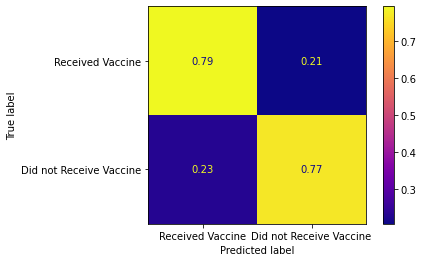

In [19]:
plot_confusion_matrix(gsl2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma', normalize='true');

In [46]:
gsm2.score(X_train2, y_train2), gsm2.score(X_test2, y_test2)

(0.8016322812166539, 0.7910539220613791)

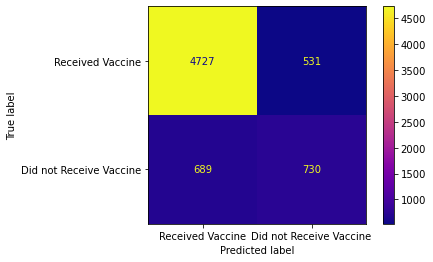

In [47]:
plot_confusion_matrix(gsm2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

In [48]:
gsk2.score(X_train2, y_train2), gsk2.score(X_test2, y_test2)

(1.0, 0.7967686274762094)

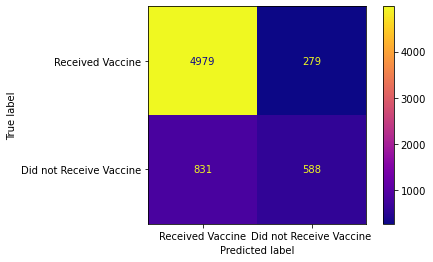

In [49]:
plot_confusion_matrix(gsk2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### Results

In general models didn't perform much better and came at the price of decreased accuracy. We need to rethink our metrics and problem statement.